In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from math import ceil, floor, sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from visualization_plots import *

In [2]:
# All atributes exept Type (nomial) are continuos ratio.
attribute_names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K ", "Ca", "Ba", "Fe", "Type"]
filename = "./glass.data"

glass_type = {
    1: "building_windows_float_processed",
    2: "building_windows_non_float_processed",
    3: "vehicle_windows_float_processed",
    4: "vehicle_windows_non_float_processed (none in this database)",
    5: "containers",
    6: "tableware",
    7: "headlamps",
}

In [4]:
### Read data ###
df = pd.read_csv(filename, names=attribute_names)
df_RI = df["RI"]
df_type = df["Type"]
# Storing type in different DF

# Revoming Type and Id
df.drop(["Id", "Type"], axis=1, inplace=True)


#### Binarize RI for classification ####

# # Calculate median of RI
# RI_median = np.median(df["RI"], axis=0)
# # Create mask for RI to binarize the data for classification
# mask = df["RI"] > RI_median

# df["RI"] = np.where(mask, 1, 0)

print(df["RI"].describe())

count    214.000000
mean       1.518365
std        0.003037
min        1.511150
25%        1.516522
50%        1.517680
75%        1.519157
max        1.533930
Name: RI, dtype: float64


In [5]:
### Summary statistics ###
summary_statistics = df.describe()

In [6]:
### Standadizing ###
standardize = StandardScaler()
df_standard = standardize.fit_transform(df)
df_standard = pd.DataFrame(df_standard, columns=df.columns)

In [7]:
#### PCA ####
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_standard)
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
explained_variance_ratio = pca.explained_variance_ratio_

df_pca_full = pd.concat([df_pca, df_type], axis=1)

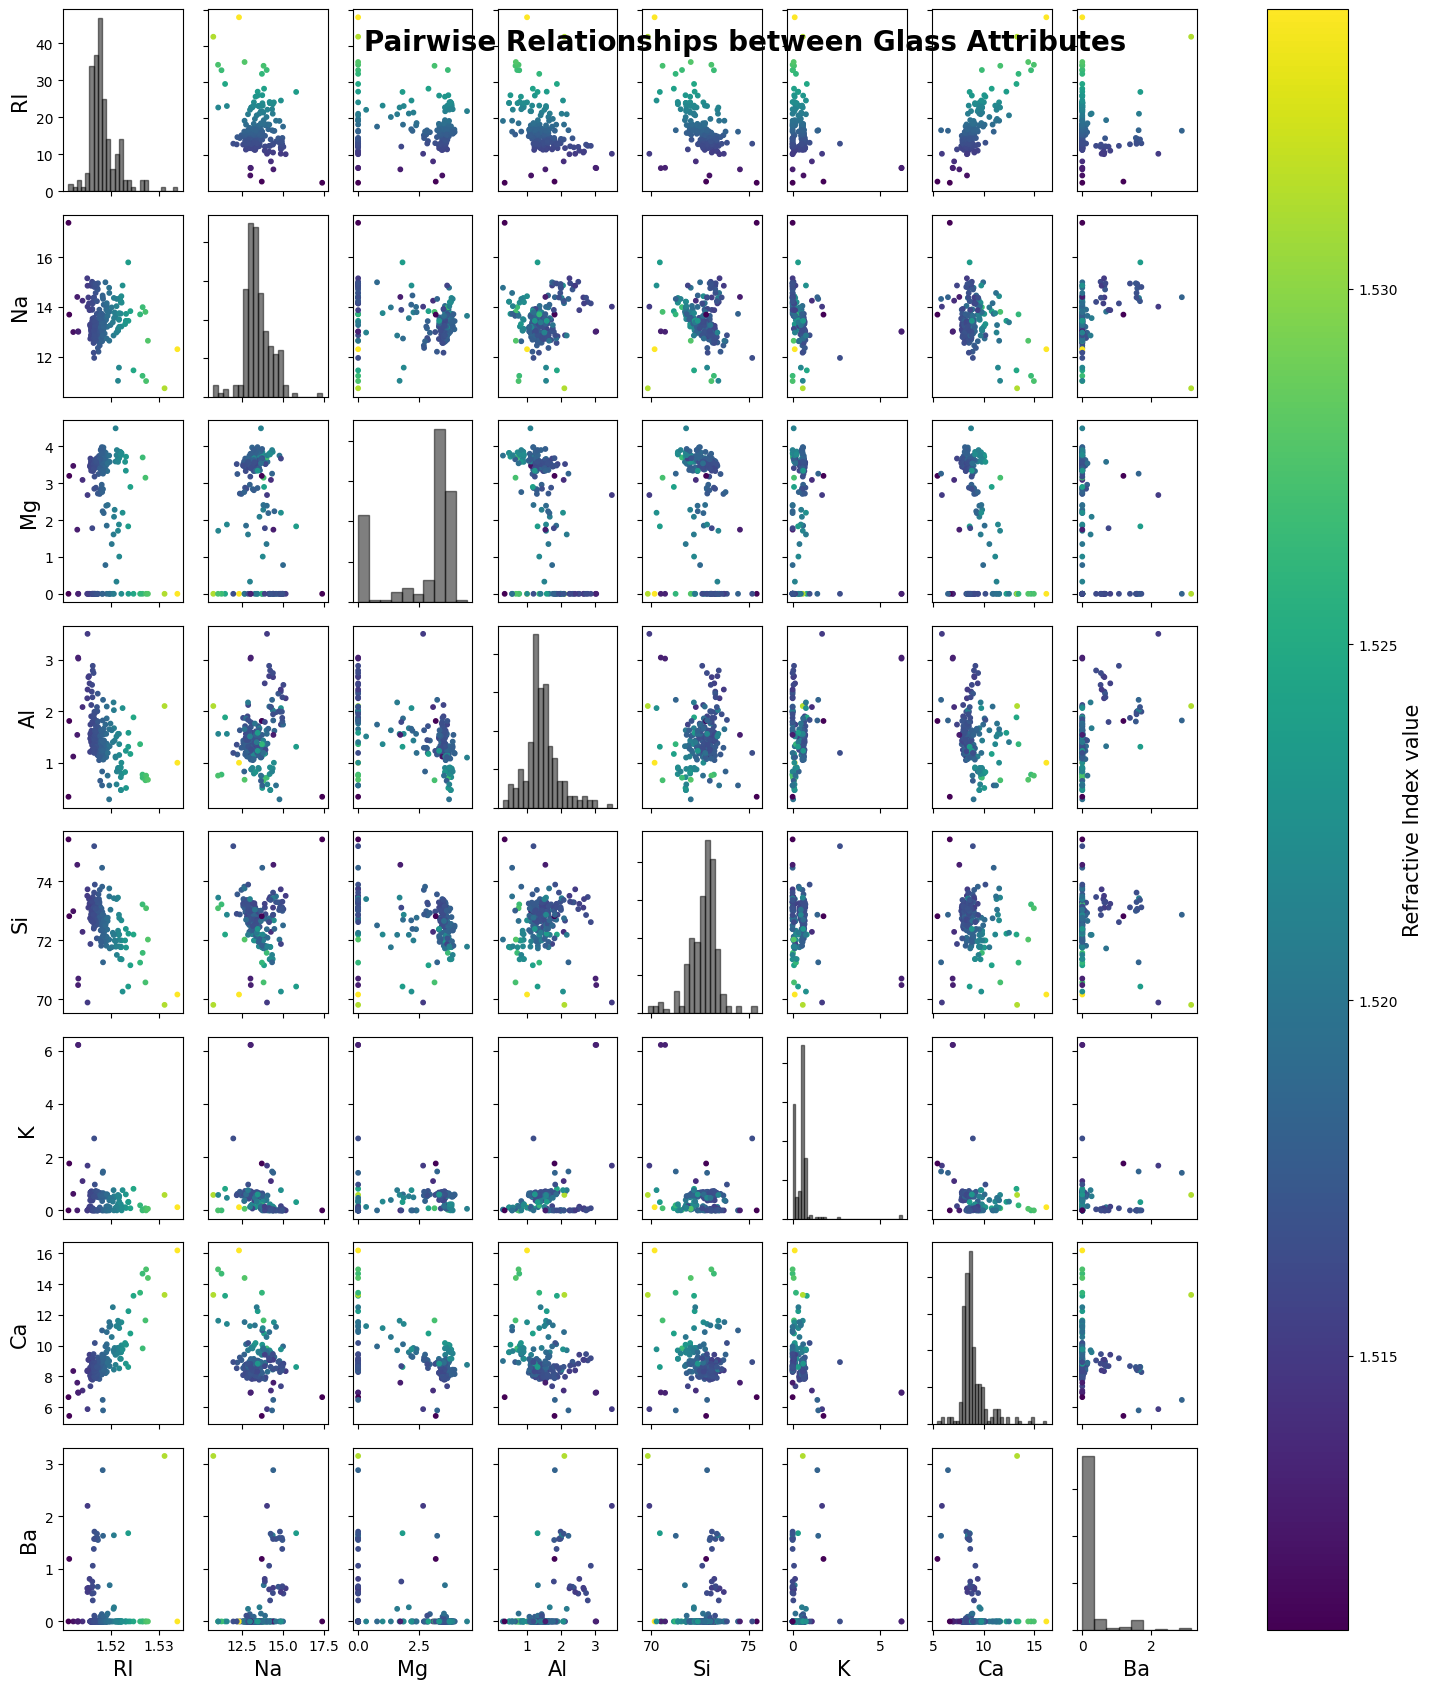

<Figure size 640x480 with 0 Axes>

In [8]:
pairplot(df)